# 1. Data Understanding & Preprocessing

In [1]:
# import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# read and display the dataset
df = pd.read_csv("PATH/TO/DATASET", sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# display list of column names
list(df)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [4]:
# length of the dataset
len(df)

1599

In [5]:
# show the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# show some statistical infos about the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# print min and max value of quality column
print("Minimum quality: ", min(df['quality']), "\nMaximum quality: ", max(df['quality']))

Minimum quality:  3 
Maximum quality:  8


In [8]:
# number of wines with quality=7
df[df['quality']==7].agg({'quality':'count'})

,0
quality,199


In [9]:
# number of wines with quality=8
df[df['quality']==8].agg({'quality':'count'})

,0
quality,18


In [10]:
# what changes on average between all wines and high-quality wines
# which features increase or decrease with quality
top_wines = df[df['quality'] >= 7]
for feature in df.columns[:-1]:
    print(f"{feature} - mean (all): {df[feature].mean():.2f} | mean (top): {top_wines[feature].mean():.2f}")

# interpretation:
# the average alcohol content across all wines is 10.42%
# but in top-rated wines, it's 11.52% → much higher!
# volatile acidity drops from 0.53 to 0.41 → lower values seem better

fixed acidity - mean (all): 8.32 | mean (top): 8.85
volatile acidity - mean (all): 0.53 | mean (top): 0.41
citric acid - mean (all): 0.27 | mean (top): 0.38
residual sugar - mean (all): 2.54 | mean (top): 2.71
chlorides - mean (all): 0.09 | mean (top): 0.08
free sulfur dioxide - mean (all): 15.87 | mean (top): 13.98
total sulfur dioxide - mean (all): 46.47 | mean (top): 34.89
density - mean (all): 1.00 | mean (top): 1.00
pH - mean (all): 3.31 | mean (top): 3.29
sulphates - mean (all): 0.66 | mean (top): 0.74
alcohol - mean (all): 10.42 | mean (top): 11.52


# 2. Exploratory Data Analysis (EDA)

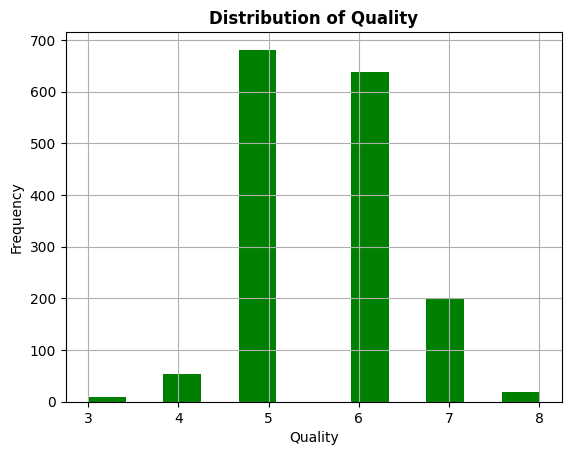

In [11]:
# draw a histogram of the quality column
df['quality'].hist(bins=12, color='green')

# add labels and title
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Quality', fontweight='bold')
plt.savefig("Quality Distribution.png")
plt.show()

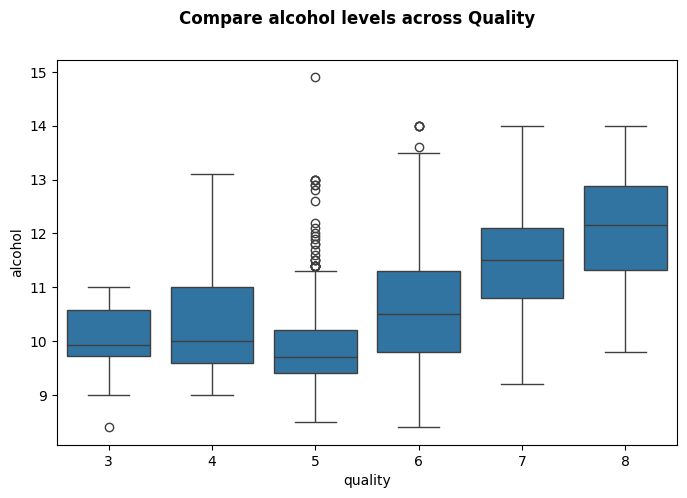

In [12]:
# visualize boxplots to compare alcohol levels across the quality
fig, ax = plt.subplots()
fig.set_size_inches(8,5)
fig.suptitle("Compare alcohol levels across Quality",fontweight='bold')
sns.boxplot(x='quality', y='alcohol', data=df)
plt.savefig("Alcohol Levels.png")
plt.show()

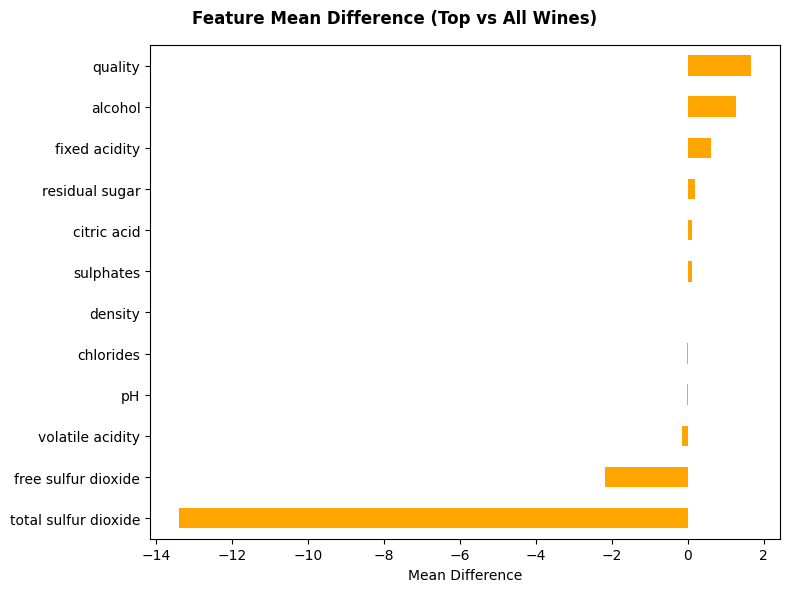

In [13]:
# comparative analysis of wine features by computing and visualizing the difference in mean value between top wine and all wine categories
summary = df.groupby(df['quality'] >= 7).agg('mean').T
summary.columns = ['All Wines (<7)', 'Top Wines (>=7)']
summary['Difference'] = summary['Top Wines (>=7)'] - summary['All Wines (<7)']
diff = summary['Difference'].sort_values()

fig, ax = plt.subplots()
fig.suptitle('Feature Mean Difference (Top vs All Wines)', fontweight='bold')
diff.plot(kind='barh', figsize=(8, 6), color='orange')

plt.xlabel('Mean Difference')
plt.tight_layout()
plt.savefig("Feature Mean Difference.png")
plt.show()


In [14]:
# correlation of the quality column for all the features
df.corr().loc['quality']

,quality
fixed acidity,0.124052
volatile acidity,-0.390558
citric acid,0.226373
residual sugar,0.013732
chlorides,-0.128907
free sulfur dioxide,-0.050656
total sulfur dioxide,-0.185100
density,-0.174919
pH,-0.057731
sulphates,0.251397


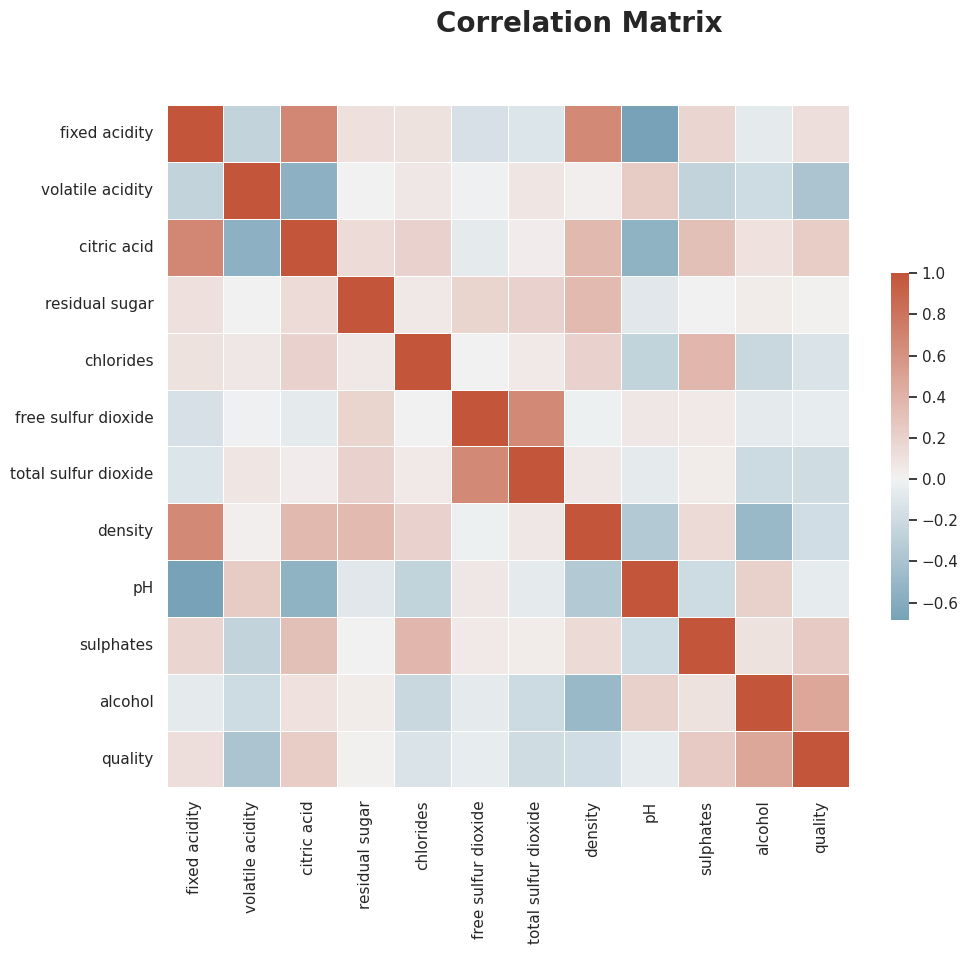

In [15]:
# create and display the correlation matrix
sns.set_theme(style="white")

corr = df.corr()

f, ax = plt.subplots(figsize=(11, 9))
f.suptitle("Correlation Matrix", fontweight='bold', fontsize=20)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("Heatmap.png")
plt.show()

In [16]:
# find the top n features that are most correlated with quality column
def top_corr(data: pd.DataFrame, column: str, n: int):
    corr_matrix = data.corr()
    corr_sorted = corr_matrix[column].sort_values(key=lambda x: -x)[1:n + 1]
    return pd.DataFrame({
        'Features': [column for _ in range(n)],
        'Top Similar Features': corr_sorted.index,
        'Correlation': corr_sorted.values
    })


result = top_corr(df, 'quality', 3)
print(result)

  Features Top Similar Features  Correlation
0  quality              alcohol     0.476166
1  quality            sulphates     0.251397
2  quality          citric acid     0.226373


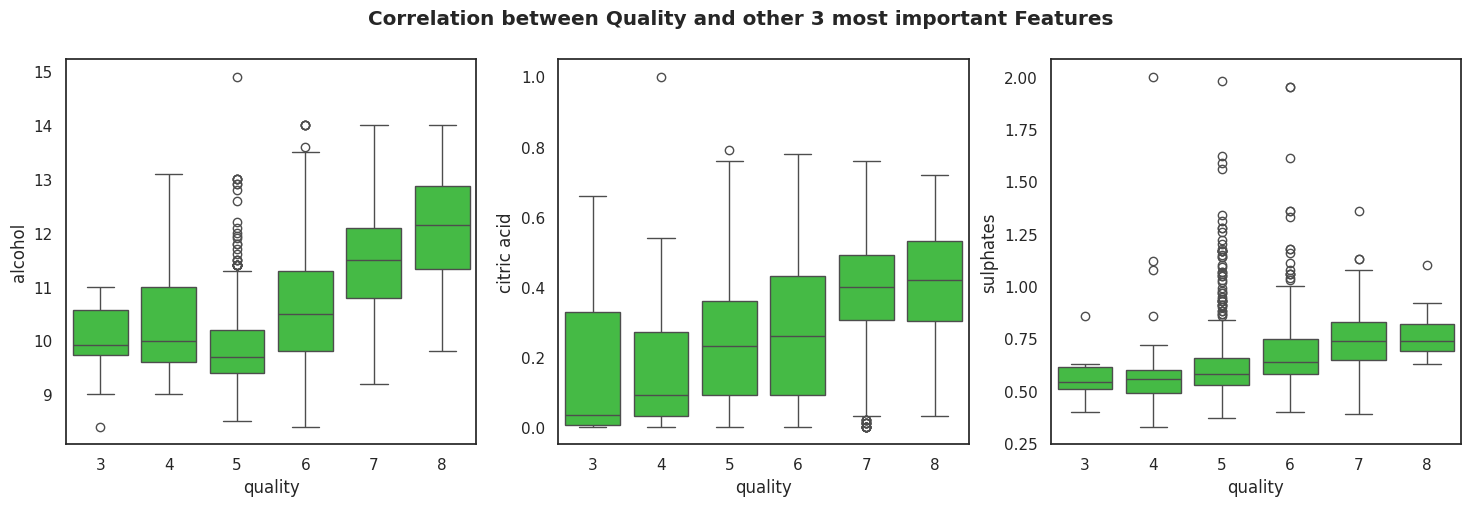

In [17]:
# visualize the correlation between quality and other 3 most important features
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Correlation between Quality and other 3 most important Features", fontweight='bold')

sns.boxplot(x='quality', y='alcohol', data=df, ax=axs[0], color='limegreen')
sns.boxplot(x='quality', y='citric acid', data=df, ax=axs[1], color='limegreen')
sns.boxplot(x='quality', y='sulphates', data=df, ax=axs[2], color='limegreen')

plt.savefig("Correlation between Quality and other 3.png")
plt.show()

# 3. Define the Business Question

In [18]:
# filter the dataset and display the top quality wines with the features which have the most influence in the quality
df[df['quality']>=7].filter(items=['citric acid','sulphates','alcohol','quality'])

,citric acid,sulphates,alcohol,quality
7,0.00,0.47,10.00,7
8,0.02,0.57,9.50,7
16,0.56,0.75,10.50,7
37,0.28,0.73,9.70,7
62,0.16,0.62,9.50,7
...,...,...,...,...
1541,0.29,0.76,10.90,7
1544,0.43,0.81,11.20,7
1549,0.30,0.70,11.40,8
1555,0.17,0.68,10.55,7


# 4. Modeling

In [19]:
# run random forest model to learn from a part of the data and later classifies the rest of the data in to good and not good wine
df['good'] = df['quality'] >= 7

X = df.drop(columns=['quality', 'good'])
y = df['good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# 5. Evaluation

In [20]:
# evaluate the model performance
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94       273
        True       0.70      0.49      0.57        47

    accuracy                           0.89       320
   macro avg       0.81      0.73      0.76       320
weighted avg       0.88      0.89      0.89       320



# 6. Feature Importance

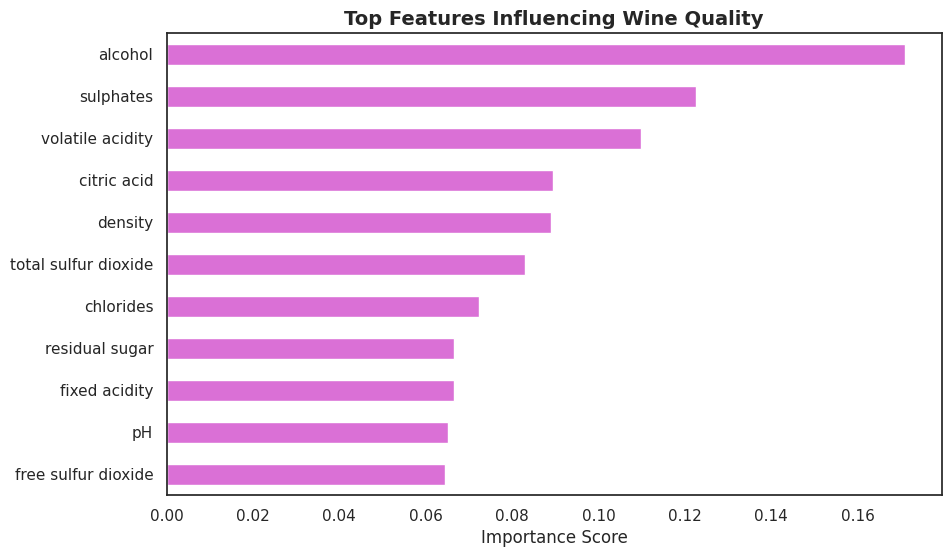

In [21]:
# visualize feature importance regarding the output of random forest
plt.title("Top Features Influencing Wine Quality", fontsize=14, fontweight='bold')
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), color='orchid')
plt.xlabel("Importance Score", fontsize=12)
plt.savefig("Top Features.png")
plt.show()

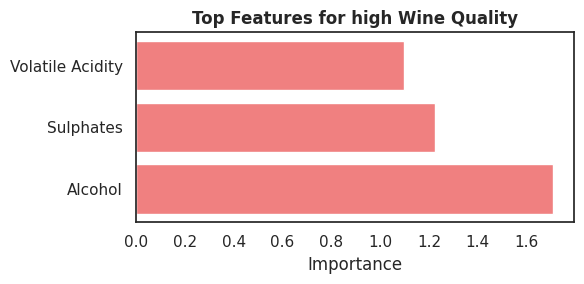

In [22]:
# get the features importance from output of random forest and visualize the top 3
features = ['Alcohol', 'Sulphates', 'Volatile Acidity']

importances = model.feature_importances_
importances_sorted = np.sort(importances)[::-1]
importances = importances_sorted[:3]*10

plt.figure(figsize=(6, 3))
plt.barh(features, importances, color='lightcoral')
plt.xlabel('Importance')
plt.title('Top Features for high Wine Quality', fontweight='bold')
plt.tight_layout()
plt.savefig("Top Features.png")
plt.show()


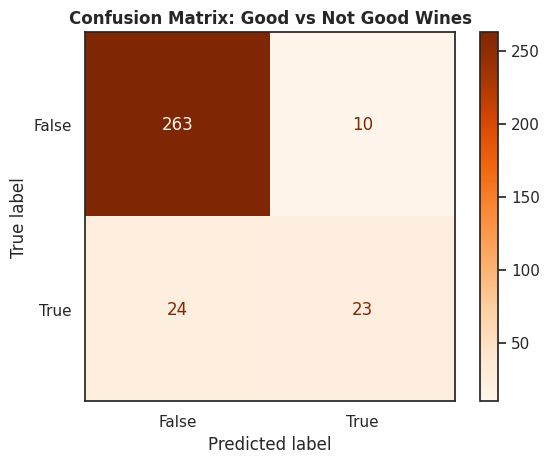

In [23]:
# create and visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Oranges)
plt.title("Confusion Matrix: Good vs Not Good Wines", fontweight='bold')
plt.savefig("Confusion Matrix.png")
plt.show()